# Interconnection Queues

In [1]:
import gridstatus
import pandas as pd
import plotly.express as px


## NYISO Interconnection Queue

The `get_interconnection_queue` call returns projects that are "active", "completed", and "withdrawn"

In [2]:
iso = gridstatus.NYISO()
queue = iso.get_interconnection_queue()
queue.head()

,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),...,Withdrawn Date,Withdrawal Comment,Actual Completion Date,Proposed In-Service,Proposed Initial-Sync,Last Update,Z,S,Availability of Studies,FS Complete/ SGIA Tender
0,0276,Homer Solar Energy Center,"Homer Solar Energy Center, LLC",Cortland,NY,Cortland - Fenner 115kV,NM-NG,Solar,90.0,90.0,...,NaN,NaN,NaN,2023-08-01,2023-09-01,2022-09-30 00:00:00,C,10.0,"FES, SRIS, FS",2021-02-08 00:00:00
1,0386,Grand Isle Intertie,"Vermont Green Line Devco, LLC",Clinton,NY,"Plattsburgh 230kV-New Haven, VT 345kV",NYPA,DC Transmission,400.0,400.0,...,NaN,NaN,NaN,2023-12-01,NaT,2018-11-30 00:00:00,D,6.0,"FES, SIS",NaT
2,0393,Berrians East Replacement,"NRG Berrians East Development, LLC",Queens,NY,Astoria East 138kV,ConEd,Dual Fuel,94.2,94.2,...,NaN,NaN,NaN,2024-05-01,2024-08-01,2022-06-30 00:00:00,J,11.0,"FES, SRIS, FS",2019-07-09 00:00:00
3,0396,Baron Winds,"Baron Winds, LLC",Steuben,NY,Hillside - Meyer 230kV,NYSEG,Wind,238.4,238.4,...,NaN,NaN,NaN,2022-05-01,2022-06-01,2021-11-30 00:00:00,C,11.0,"FES, SRIS, FS",2019-07-09 00:00:00
4,0396A,Wood Street Transformer,New York State Electric & Gas,Putnam,NY,Wood St. 345/115kV,NYSEG,AC Transmission,NaN,NaN,...,NaN,NaN,NaN,2022-12-01,NaT,2021-04-30 00:00:00,G,12.0,SIS,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,583,Fulton,"Erie Boulevard Hydropower, LP",Oswego,NY,Fay St. 34.5kV,NM-NG,Hydro,1.3,1.3,...,NaN,NaN,3/31/18,2025-07-01,2025-11-01,3/31/18,C,14,FS,2017-07-12 00:00:00
117,0696,Swinging Bridge Unit 3,"Eagle Creek Hydro Power, LLC",Orange,NY,Swing Bridge 69 kV,O&R,Hydro,1.2,1.2,...,NaN,NaN,2020-04-30 00:00:00,2024-11-01,2024-12-01,2020-04-30 00:00:00,G,14,NaN,2018-06-20 00:00:00
118,0701,KCE NY 1,"KCE NY 1, LLC",Saratoga,NY,Luther - Forest Substation 34.5kV,NYSEG,Energy Storage,20.0,20.0,...,NaN,NaN,2020-04-30 00:00:00,2022-10-01,2022-11-01,2020-04-30 00:00:00,F,14,NaN,2018-06-20 00:00:00
119,0731,Branscomb Solar,"Branscomb Solar, LLC",Washington,NY,Battenkill - Eastover 115kV,NM-NG,Solar,20.0,20.0,...,NaN,NaN,2022-03-31 00:00:00,2024-11-01,2025-02-01,2022-03-31 00:00:00,F,14,"FES, SIS, FS",2020-04-29 00:00:00


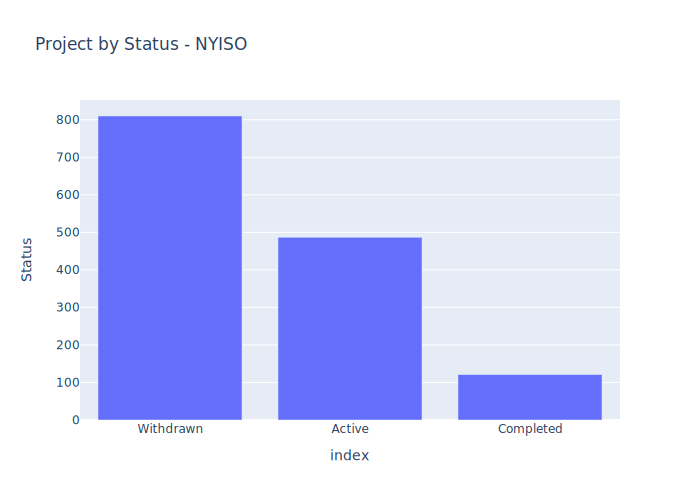

In [3]:
status_distributions = queue["Status"].value_counts()
fig = px.bar(status_distributions, x=status_distributions.index, y="Status", title="Project by Status - NYISO")
fig.show("svg")

## Days in Queue

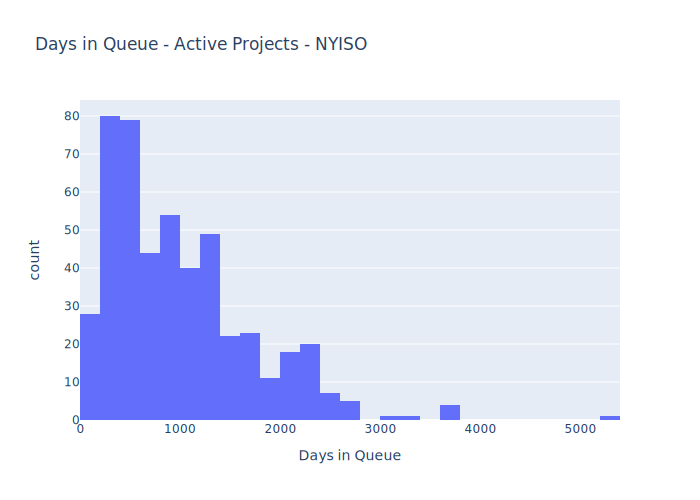

In [4]:
queue["Days in Queue"] = (pd.Timestamp.now() - queue["Queue Date"]).dt.days
active = queue[queue["Status"] == "Active"]
fig = px.histogram(active, x="Days in Queue", title="Days in Queue - Active Projects - NYISO")
fig.show("svg")


## Top Active Project Types

In [5]:
generation_types = active["Generation Type"].value_counts()
fig = px.bar(generation_types, x=generation_types.index, y="Generation Type", title="Project by Type - NYISO")
fig.show("svg")

## Proposed Completion Date

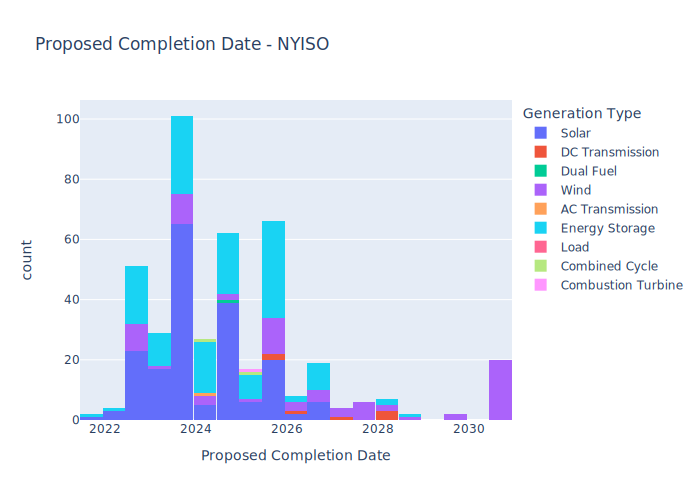

In [20]:
fig = px.histogram(active, x="Proposed Completion Date", title="Proposed Completion Date - NYISO", color="Generation Type")
fig.show('svg')

## Get Interconnection Queue Data from All ISOs

In [24]:
all_queues = gridstatus.get_interconnection_queues()
all_queues

100%|██████████| 7/7 [00:21<00:00,  3.01s/it]


,ISO,Queue ID,Project Name,Interconnecting Entity,County,State,Interconnection Location,Transmission Owner,Generation Type,Capacity (MW),Summer Capacity (MW),Winter Capacity (MW),Queue Date,Status,Proposed Completion Date,Withdrawn Date,Withdrawal Comment,Actual Completion Date
0,Midcontinent ISO,E002,None,None,Pointe Coupee,LA,500 kV switchyard at Big Cajon II,Entergy,Gas,15.000000,15.0,15.0,2013-09-13T04:00:00Z,Done,None,None,None,None
1,Midcontinent ISO,E291,None,None,,TX,Rich 138 kV substation,Entergy,Hydro,27.000000,27.0,27.0,2012-05-15T04:00:00Z,Done,2016-01-31T05:00:00Z,None,None,None
2,Midcontinent ISO,G001,None,None,Brown County,WI,Unknown,American Transmission Co. LLC,,255.000000,255.0,255.0,1995-11-08T05:00:00Z,Withdrawn,2014-11-17T05:00:00Z,None,None,None
3,Midcontinent ISO,G002,None,None,Trimble County,KY,Unknown,LG&E and KU Services Company as agent for Loui...,Coal,174.000000,174.0,174.0,1998-12-01T05:00:00Z,Done,2016-01-01T05:00:00Z,None,None,None
4,Midcontinent ISO,G003,None,None,Trimble County,KY,Unknown,LG&E and KU Services Company as agent for Loui...,Coal,174.000000,174.0,174.0,1998-12-01T05:00:00Z,Done,2004-01-01T05:00:00Z,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19557,ISO New England,1308,Uxbridge Substation – NG Hopedale West Group S...,None,Worcester,MA,"NG Feeder 321W6, Uxbridge T2",NaN,BAT,6.994000,6.994,6.994,2022-09-09 00:00:00,Withdrawn,2024-11-15 00:00:00,NaT,None,None
19558,ISO New England,1310,Battery Storage,None,Berkshire,MA,115 kV Transmission line (1211 - Present betwe...,NaN,BAT,118.750000,118.75,118.75,2022-09-22 00:00:00,Withdrawn,2025-09-30 00:00:00,NaT,None,None
19559,ISO New England,1314,Offshore Wind,None,NaN,MA,"Eversource 115kV Acushnet, lines 112/114",NaN,WND,470.000000,470.0,470.0,2022-09-26 00:00:00,Withdrawn,2029-09-01 00:00:00,NaT,None,None
19560,ISO New England,1315,Battery Storage,None,Windham,CT,"Eversource Killingly Substation,115kV BUS, Tra...",NaN,BAT,106.970001,106.970001,106.970001,2022-09-28 00:00:00,Withdrawn,2026-06-09 00:00:00,NaT,None,None


In [25]:
all_queues["Status"].value_counts()

Withdrawn                                    7405
Active                                       6431
WITHDRAWN                                    1481
In Service                                   1028
Completed                                     751
Done                                          746
ACTIVE                                        594
Engineering and Procurement                   301
Confirmed                                     223
COMPLETED                                     199
Retracted                                     131
Suspended                                      74
Under Construction                             58
Deactivated                                    54
Partially in Service - Under Construction      46
Annulled                                       24
Withdrawn - Pending Cure                        2
                                                1
Name: Status, dtype: int64